In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
#import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [3]:
#print(plt.style.available)

In [47]:
df_all = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp April\Python\web_scraping_project\data prepared for analysis\cleaned data\df_deduped.csv')

In [5]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1780 entries, 0 to 1779
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   1780 non-null   int64  
 1   cat_name                     1780 non-null   object 
 2   num_images                   1780 non-null   int64  
 3   num_videos                   1780 non-null   int64  
 4   age                          1780 non-null   object 
 5   breed                        1780 non-null   object 
 6   color                        1780 non-null   object 
 7   sex                          1780 non-null   object 
 8   characteristics              1780 non-null   object 
 9   good_in_a_home_with          1780 non-null   object 
 10  adoption_fee                 272 non-null    object 
 11  prefers_a_home_without       1780 non-null   object 
 12  coat_length                  1219 non-null   object 
 13  pet_story_num_word

In [25]:
def proc_freq(df,variable_):  #Note variable_ must be given in quotes example: variable_ = 'xyz'
    datax = df[variable_].value_counts().sort_index()
    
    datay = pd.DataFrame({
        variable_: datax.index,
        'Frequency': datax.values,
        'Percent': ((datax.values/datax.values.sum())*100).round(2),
        'Cumulative_Frequency': datax.values.cumsum(),
        'Cumulative_Percent': ((datax.values.cumsum()/datax.values.sum())*100).round(2)   })
    
    #datay.set_index(variable_)
    #return(datay.set_index(variable_))
    return(datay)

In [23]:
df_all['pictures'] = [str(x) for x in df_all['num_pictures'] ]

In [36]:
df_all['has_picture'] = df_all['num_pictures'] > 0
df_all['has_picture'].value_counts()

True     1412
False     368
Name: has_picture, dtype: int64

In [41]:
df_all['has picture'] = df_all['num_pictures'] > 0

In [51]:
# [s+100 if s<2000 else s for s in salaries]
df_all['has_picture'] = ['Picture' if p != 0 else 'No Picture' for p in df_all['num_pictures']]
df_all['has_picture'].value_counts()

Picture       1412
No Picture     368
Name: has_picture, dtype: int64

In [55]:
# video
df_all['has_video'] = ['Video' if v == True else 'No Video' for v in df_all['video']]
df_all['has_video'].value_counts()

No Video    1617
Video        163
Name: has_video, dtype: int64

In [27]:
df_all['pictures'].value_counts()

3    388
0    368
6    304
2    277
5    239
4    200
1      4
Name: pictures, dtype: int64

In [44]:
def compare_percent(var_):
    df1 = df_all.loc[(df_all['Days_On_Site']=='Less Than Thirty Days'),:]
    df2 = df_all.loc[(df_all['Days_On_Site']=='Thirty Days Plus'),:]
    
    freq1 = proc_freq(df1,var_)
    freq1['Days_On_Site'] = 'Less Than Thirty Days'
    
    freq2 = proc_freq(df2,var_)
    freq2['Days_On_Site'] = 'Thirty Days Plus'
    
    stacked = pd.concat([freq1, freq2], axis = 0, sort=False)
    stacked = stacked.loc[:,[var_,'Percent','Days_On_Site']]
    return(stacked)

In [8]:
compare_percent('age')

,age,Percent,Days_On_Site
0,Adult,18.03,Less Than Thirty Days
1,Kitten,58.59,Less Than Thirty Days
2,Senior,4.23,Less Than Thirty Days
3,Young,19.15,Less Than Thirty Days
0,Adult,40.98,Thirty Days Plus
1,Kitten,26.18,Thirty Days Plus
2,Senior,6.88,Thirty Days Plus
3,Young,25.96,Thirty Days Plus


In [42]:
df_thirty = df_all.loc[df_all.thirty_days==True,:]
df_other_days = df_all.loc[df_all.thirty_days==False,:]

def func_freq(lst):
    for el in lst:
        print('Thirty Days Plus')
        print(proc_freq(df_thirty,el))
        print()
        print('Less Than Thirty Days')
        print(proc_freq(df_other_days,el))
        print('_'*75)


cols=['age','sex','without_story','coat_length_miss','coat_length', 'more_than_1_cat','breed_type','video', \
      'pictures','num_pictures']
func_freq(cols)

Thirty Days Plus
      age  Frequency  Percent  Cumulative_Frequency  Cumulative_Percent
0   Adult        584    40.98                   584               40.98
1  Kitten        373    26.18                   957               67.16
2  Senior         98     6.88                  1055               74.04
3   Young        370    25.96                  1425              100.00

Less Than Thirty Days
      age  Frequency  Percent  Cumulative_Frequency  Cumulative_Percent
0   Adult         64    18.03                    64               18.03
1  Kitten        208    58.59                   272               76.62
2  Senior         15     4.23                   287               80.85
3   Young         68    19.15                   355              100.00
___________________________________________________________________________
Thirty Days Plus
      sex  Frequency  Percent  Cumulative_Frequency  Cumulative_Percent
0  Female        754    52.91                   754               52.91
1  

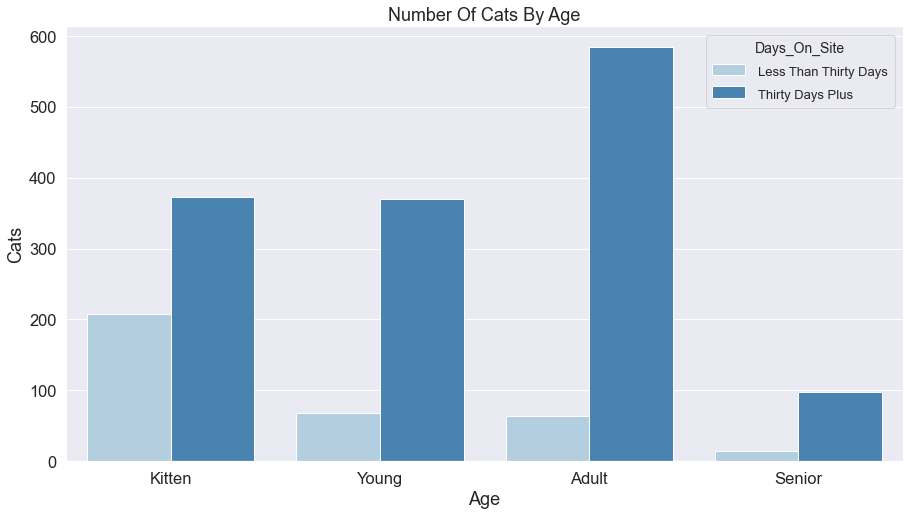

<Figure size 1080x576 with 0 Axes>

In [43]:
# Bigger than normal fonts
sns.set(font_scale=1.5)

sns.set_style('darkgrid')
color_order=['Kitten','Young','Adult','Senior']
 
chart = sns.countplot(x='age', data = df_all, hue='Days_On_Site',order=color_order, palette='Blues')

chart.set(xlabel="Age", ylabel = "Cats")

chart.set(title='Number Of Cats By Age')

# chart.xaxis.get_label().set_fontsize(20)
# chart.yaxis.get_label().set_fontsize(20)

plt.figure(figsize = (15,8))

plt.savefig('Number Of Cats By Age ndup.png', dpi=300)

sns.set(rc = {'figure.figsize':(15,8)})

#box.set_xlabel("Days On Site",fontsize=15)
#chart.set_ylabel("Number Of Cats",fontsize=15)

# for legend text
plt.setp(chart.get_legend().get_texts(), fontsize='13') 
 
# for legend title
plt.setp(chart.get_legend().get_title(), fontsize='14') 
plt.show()

In [ ]:
# def compare_percent(var_):
#     df1 = df_all.loc[(df_all['Days_On_Site']=='Less Than Thirty Days'),:]
#     df2 = df_all.loc[(df_all['Days_On_Site']=='Thirty Days Plus'),:]
    
#     freq1 = proc_freq(df1,var_)
#     freq2 = proc_freq(df2,var_)
    
#     stacked = pd.concat([freq1, freq2], axis = 0, sort=False)
#     stacked = stacked.loc[:,[var_,'Percent']]
#     return(stacked)



In [90]:
combined

,age,Percent,Days_On_Site
0,Adult,35.84,Less Than Thirty Days
1,Kitten,34.07,Less Than Thirty Days
2,Senior,6.53,Less Than Thirty Days
3,Young,23.56,Less Than Thirty Days
0,Adult,17.45,Thirty Days Plus
1,Kitten,56.60,Thirty Days Plus
2,Senior,2.36,Thirty Days Plus
3,Young,23.58,Thirty Days Plus


C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


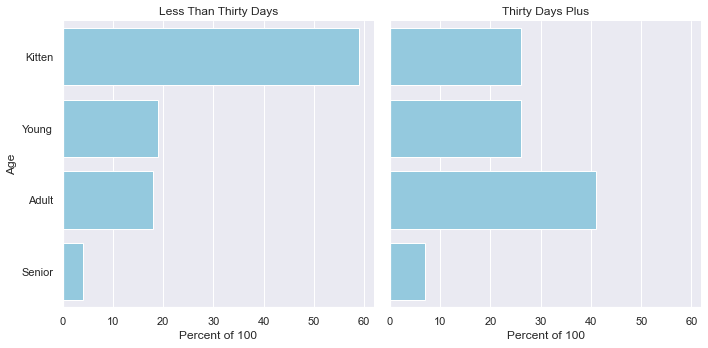

<Figure size 1080x576 with 0 Axes>

In [57]:
combined= compare_percent('age')
combined['Percent']= round(combined['Percent'])

# set style
sns.set_style('darkgrid')

color_order=['Kitten','Young','Adult','Senior']
chart = sns.factorplot(y='age', x='Percent', col='Days_On_Site', data=combined, kind='bar', ci=False, \
                       order=color_order,color='skyblue')#,estimator=x)


# for i in range(len(df)):
#     chart.annotate(str(df[i]), xy=(i, df[i]),horizontalalignment = 'center',fontsize=20);


chart.set(ylabel="Age", xlabel = "Percent of 100")

plt.figure(figsize = (15,8))

chart.set_titles(col_template= '{col_name}',fontsize='14');



#set font size 
# sns.set(font_scale=1.5)
#sns.set(font_scale=2)
#plt.figure(figsize = (15,8))

plt.savefig('Days_On_Site_comparison nodup.png', dpi=300)
sns.set(rc = {'figure.figsize':(15,8)})

# # for legend text
# plt.setp(chart.get_legend().get_texts(), fontsize='13') 
 
# # for legend title
# plt.setp(chart.get_legend().get_title(), fontsize='14') 
plt.show()
#combined.info()

Coat Color doesn't provide any useful information

In [35]:
# with sns.plotting_context(font_scale=1.5):
#     sns.factorplot(y='age', x='Percent', col='Days_On_Site', data=combined, kind='bar', ci=False, \
#                        order=color_order,color='skyblue')#,estimator=x)


In [12]:
# combined= compare_percent('color_new')
# sns.set_style('darkgrid')

# # pct = combined.groupby(['Days_On_Site','age'])['Percent'].mean()
# # print(type(pct))
# # pct = pct.reset_index()
# # print(pct)

# #sns.set_color_codes("pastel")


# sns.reset_orig

# chart = sns.factorplot(y='color_new', x='Percent', col='Days_On_Site', data=combined, kind='bar', ci=False, )

# chart.set(xlabel="Percent of 100", ylabel = "Coat Color")

# plt.figure(figsize = (15,8))

# chart.set_titles(col_template= '{col_name}');


C:\Users\dgarb\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


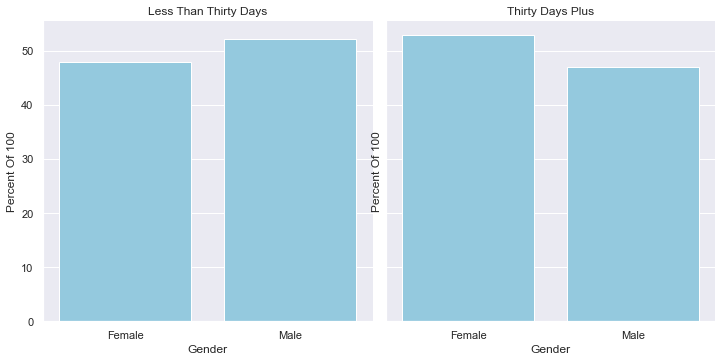

In [13]:
combined= compare_percent('sex')
sns.set_style('darkgrid')

chart = sns.factorplot( y='Percent', x='sex', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(ylabel = "Percent Of 100", xlabel="Gender")

chart.set_titles(col_template= '{col_name}');



In [77]:
# freqdata = proc_freq(df_all,'sex')
# #print(freqdata)
# chart = sns.barplot(x='sex',y='Percent',data=freqdata,ci=None,color='skyblue')
# chart.set(ylabel = "Percent Of 100", xlabel="")
# chart.set_title('Gender')

In [ ]:
freqdata = proc_freq(df_all,'more_than_1_cat')
chart = sns.barplot(x='sex',y='Percent',data=freqdata,ci=None,color='skyblue')
chart.set(ylabel = "Percent Of 100", xlabel="")
chart.set_title('Gender')

In [87]:
compare_pct_category('more_than_1_cat','age')

In [15]:
combined= compare_percent('coat_length')
sns.set_style('darkgrid')

chart = sns.factorplot(x='coat_length', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Coat Length", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');
 


C:\Users\dgarb\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\dgarb\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


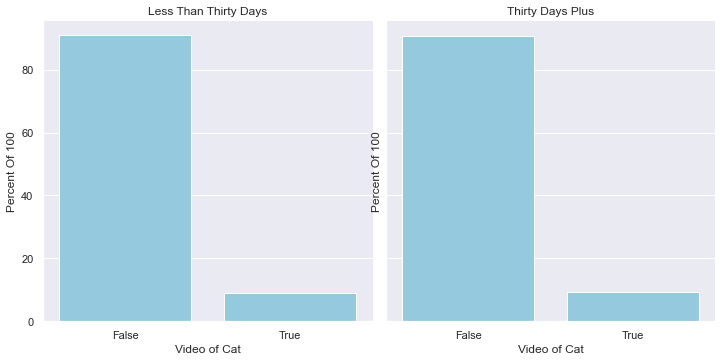

In [16]:
combined= compare_percent('video')
sns.set_style('darkgrid')

chart = sns.factorplot('video', 'Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Video of Cat", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');
 

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


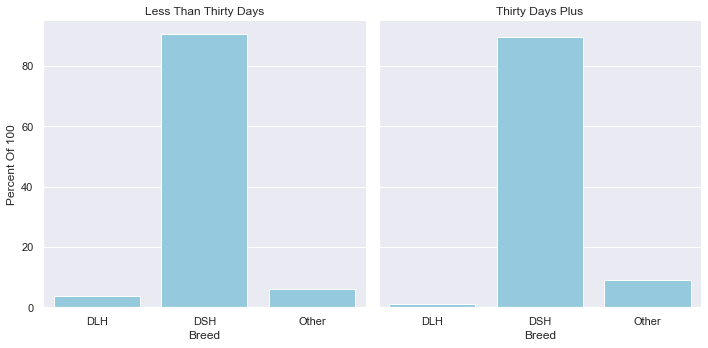

In [53]:
combined= compare_percent('breed_type')
sns.set_style('darkgrid')

chart = sns.factorplot(x='breed_type', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Breed", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');
 

Days_On_Site
Less Than Thirty Days     86.0
Thirty Days Plus         108.0
Name: pet_story_num_words, dtype: float64
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Number Of Words In Pet Narrative')

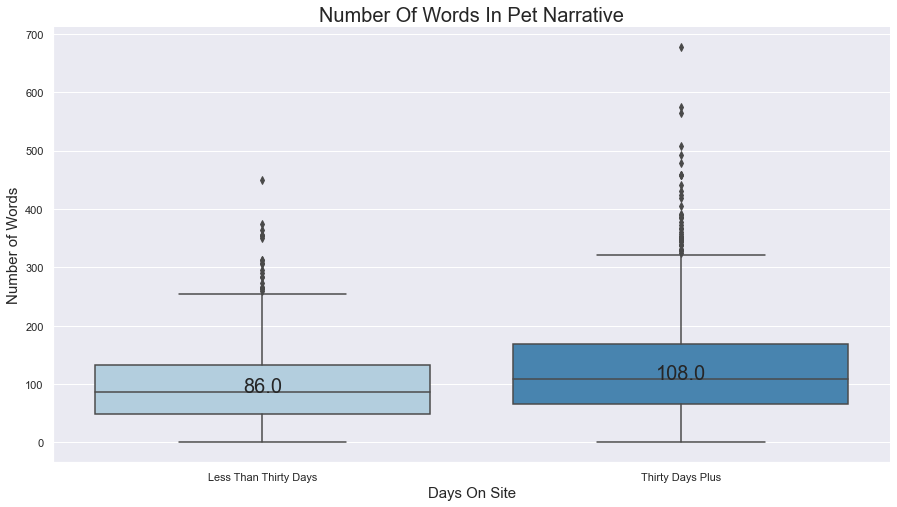

In [47]:
medians = df_all.groupby('Days_On_Site')['pet_story_num_words'].median()
print(medians)
print(type(df_all.groupby('Days_On_Site')['pet_story_num_words'].median()))
# for i in range(len(medians)):
#     box.annotate(str(medians[i]), xy=(i,medians[i],horizontalalignment = 'center')

sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Days_On_Site', y='pet_story_num_words', data=df_all,palette='Blues')
for i in range(len(medians)):
    box.annotate(str(medians[i]), xy=(i,medians[i]),horizontalalignment = 'center',fontsize=20);

#box.set(xlabel="Days On Site", ylabel = "Percent Of 100")

box.set_xlabel("Days On Site",fontsize=15)
box.set_ylabel("Number of Words",fontsize=15)
                 
#hue="smoker", palette=["m", "g"],
#sns.despine(offset=10,trim=False)
sns.despine()
box.set_title('Number Of Words In Pet Narrative',fontsize=20)


Text(0.5, 1.0, 'Number Of Pictures')

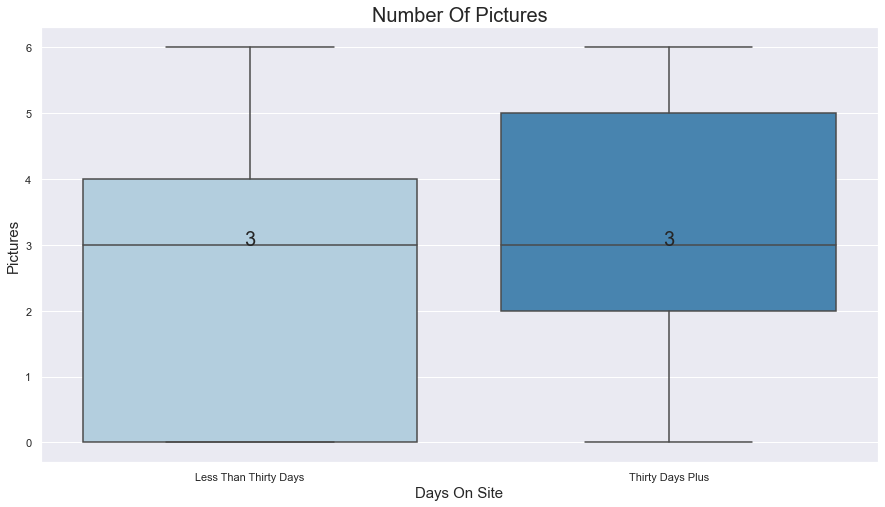

In [35]:
combined= compare_percent('num_images') #num_pictures
medians = df_all.groupby('Days_On_Site')['num_images'].median()

sns.set(rc = {'figure.figsize':(15,8)})
box = sns.boxplot(x='Days_On_Site', y='num_images', data=df_all, palette='Blues')
for i in range(len(medians)):
    box.annotate(str(medians[i]), xy=(i,medians[i]),horizontalalignment = 'center',fontsize=20);

#hue="smoker", palette=["m", "g"],
#sns.despine(offset=10, trim=True)

box.set_xlabel("Days On Site",fontsize=15)
#box.set_xlabel("",fontsize=15)
box.set_ylabel("Pictures",fontsize=15)
box.set_title('Number Of Pictures',fontsize=20)

In [ ]:
df_all['pictures']

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


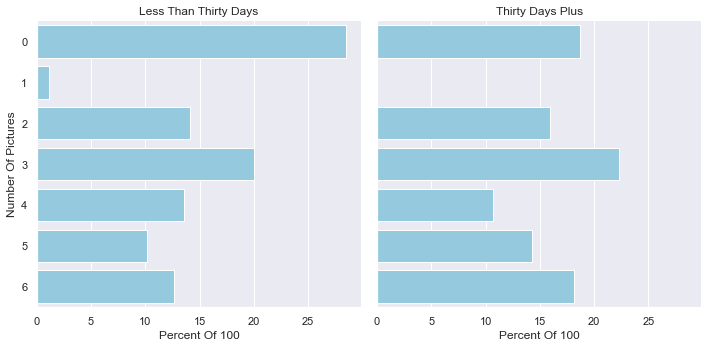

In [30]:
combined= compare_percent('pictures') #'Percent'
sns.set_style('darkgrid')



chart = sns.factorplot(x='Percent', y='pictures', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(ylabel="Number Of Pictures", xlabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


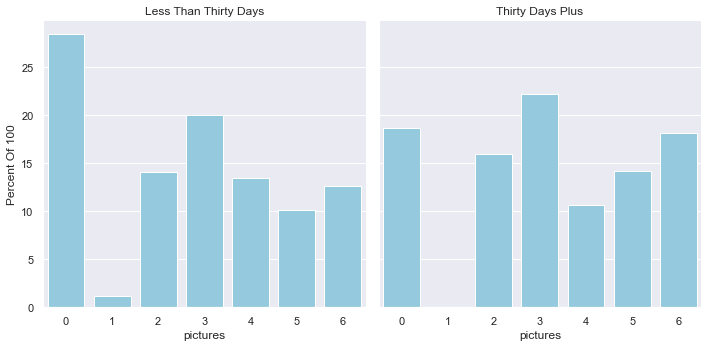

In [31]:
combined= compare_percent('pictures')
sns.set_style('darkgrid')

chart = sns.factorplot(x='pictures', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="pictures", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


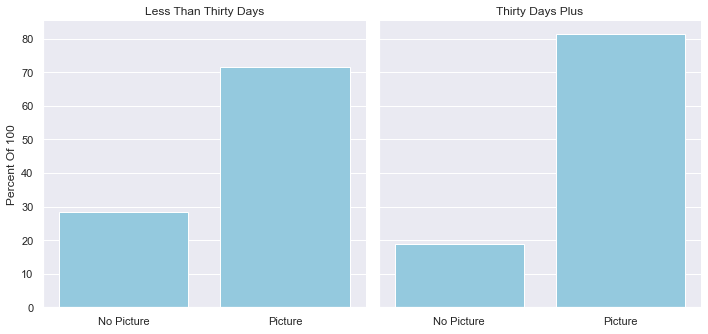

In [54]:


combined= compare_percent('has_picture')
sns.set_style('darkgrid')

chart = sns.factorplot(x='has_picture', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


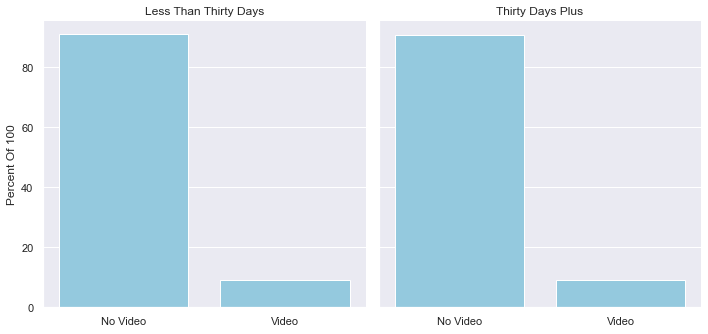

In [56]:
df_all['has_video']

combined= compare_percent('has_video')
sns.set_style('darkgrid')

chart = sns.factorplot(x='has_video', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');

In [ ]:
combined= compare_percent('breed_type')
sns.set_style('darkgrid')

chart = sns.factorplot(x='breed_type', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Breed", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');

In [ ]:
# rankings_pd.rename(columns = {'test':'TEST'}, inplace = True)

C:\Users\dgarb\anaconda3_reinstall\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


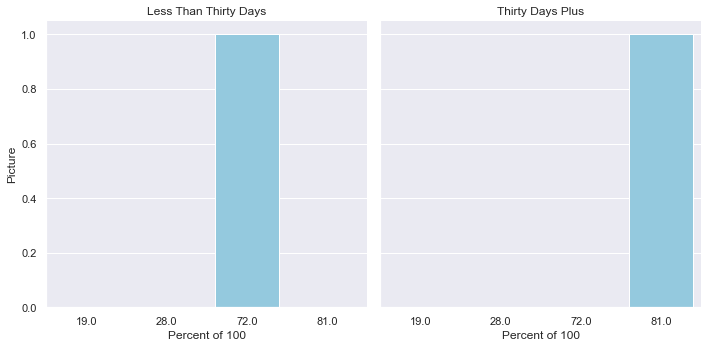

<Figure size 1080x576 with 0 Axes>

In [39]:
combined= compare_percent('has_picture')
combined['Percent']= round(combined['Percent'])

# set style
sns.set_style('darkgrid')

# color_order=['Kitten','Young','Adult','Senior']
chart = sns.factorplot(y='has_picture', x='Percent', col='Days_On_Site', data=combined, kind='bar', ci=False, \
                      color='skyblue')#,estimator=x)


# for i in range(len(df)):
#     chart.annotate(str(df[i]), xy=(i, df[i]),horizontalalignment = 'center',fontsize=20);


chart.set(ylabel="Picture", xlabel = "Percent of 100")

plt.figure(figsize = (15,8))

chart.set_titles(col_template= '{col_name}',fontsize='14');



#set font size 
# sns.set(font_scale=1.5)
#sns.set(font_scale=2)
#plt.figure(figsize = (15,8))

plt.savefig('Days_On_Site_comparison nodup.png', dpi=300)
sns.set(rc = {'figure.figsize':(15,8)})

# # for legend text
# plt.setp(chart.get_legend().get_texts(), fontsize='13') 
 
# # for legend title
# plt.setp(chart.get_legend().get_title(), fontsize='14') 
plt.show()
#combined.info()

In [ ]:
combined= compare_percent('num_pictures')
sns.set_style('darkgrid')

chart = sns.factorplot(x='more_than_1_cat', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Cats Listed Together", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');
 

In [ ]:
combined.num_pictures

C:\Users\dgarb\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


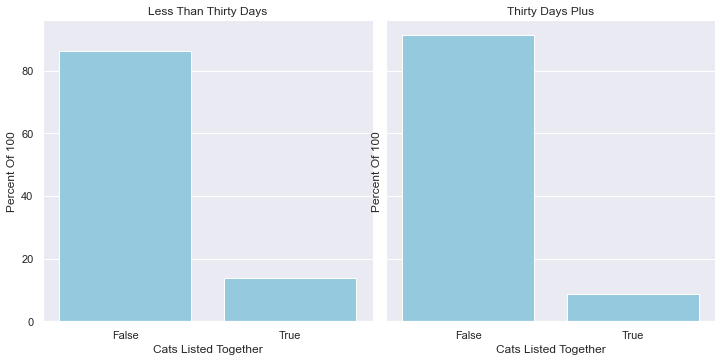

In [48]:
combined= compare_percent('more_than_1_cat')
sns.set_style('darkgrid')

chart = sns.factorplot(x='more_than_1_cat', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Cats Listed Together", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');
 

C:\Users\dgarb\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


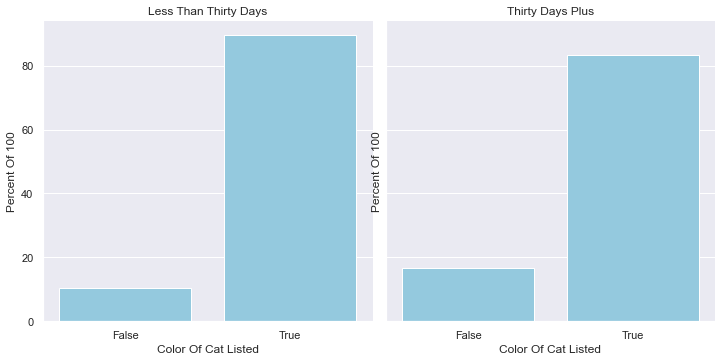

In [49]:
combined= compare_percent('color_bool')
sns.set_style('darkgrid')

chart = sns.factorplot(x='color_bool', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Color Of Cat Listed", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');
 

C:\Users\dgarb\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


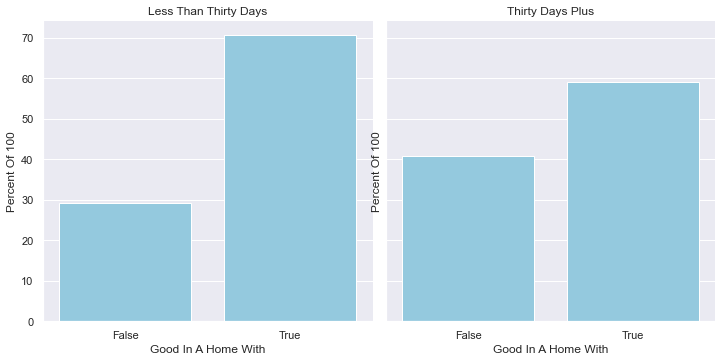

In [50]:
combined= compare_percent('good_in_a_home_with_bool')
sns.set_style('darkgrid')

chart = sns.factorplot(x='good_in_a_home_with_bool', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Good In A Home With", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');
 

C:\Users\dgarb\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


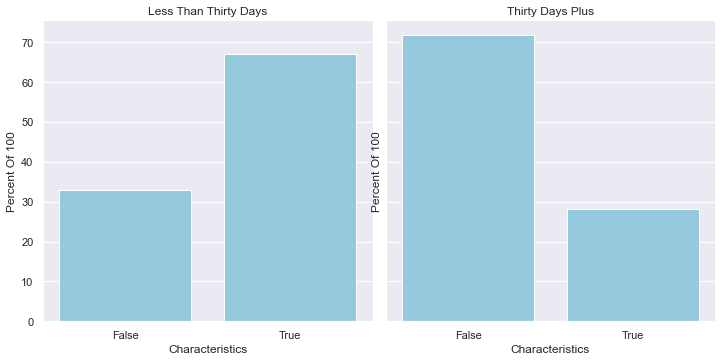

In [54]:


combined= compare_percent('characteristics_bool')
sns.set_style('darkgrid')

chart = sns.factorplot(x='characteristics_bool', y='Percent', col='Days_On_Site', data=combined, kind='bar',color='skyblue')
chart.set(xlabel="Characteristics", ylabel = "Percent Of 100")

chart.set_titles(col_template= '{col_name}');
 
